In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot


模型載入 

In [8]:
def load_data(df, sequence_length=10, split=0.8):
    data_all = np.array(df).astype(float)    # 轉為浮點型別矩陣
    #print(data_all.shape) # (241,1)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)  # 將數據縮放為 0~1 之間
    data = []
    # data 資料共有 (241-10-1)=230 筆
    for i in range(len(data_all) - sequence_length - 1):
        # 每筆 data 資料有 11 欄
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')

    x = reshaped_data[:, :-1] # 第 1至第10個欄位為 特徵
    y = reshaped_data[:, -1]  # 第 11個欄位為 label
    #print(x.shape,y.shape) # (230,10,1) (230,1)
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary] # 前 80% 為 train 的特徵
    test_x = x[split_boundary:]   # 最後 20% 為 test 的特徵
 
    train_y = y[: split_boundary] # 前 80% 為 train 的 label
    test_y = y[split_boundary:]   # 最後 20% 為 test 的 label

    return train_x, train_y, test_x, test_y, scaler

模型建立

In [9]:
def build_model():
    model = Sequential()     
    # 隱藏層：256 個神經元，input_shape：(10,1)
    # TIME_STEPS=10,INPUT_SIZE=1
    model.add(LSTM(input_shape=(10,1),units=256,unroll=False))
    model.add(Dense(units=1)) # 輸出層：1 個神經元
    #compile:loss, optimizer, metrics
    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
    return model

訓練模型

In [10]:
def train_model(train_x, train_y, test_x, test_y):
    model = build_model()
    try:
        model.fit(train_x, train_y, batch_size=10000, epochs=10, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, )) #轉換為1維矩陣
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    return predict, test_y #傳回 預測值和真實值

 主程式

In [11]:
# pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告
filename = './data/Train_X.csv'
filename2 = './data/Train_Y.csv'
df = pd.read_csv(filename, encoding='cp950')
df1 = pd.read_csv(filename2, encoding='cp950')
ddprice=pd.DataFrame(df['收盤價'])
ddprice

,收盤價
0,9.04
1,57.60
2,29.50
3,34.76
4,24.30
...,...
405205,102.20
405206,94.86
405207,98.22
405208,NaN


In [12]:
train_x, train_y, test_x, test_y, scaler =load_data(ddprice, sequence_length=10, split=0.8)
# train_x 共 230*0.8=184 筆, test_x 共 230*0.2=46 筆
#print(train_x.shape,train_y.shape) # (184,10,1) (184,1)
#print(test_x.shape,test_y.shape)   # (46,10,1)  (46,1)
predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
predict_y = scaler.inverse_transform([[i] for i in predict_y]) # 還原
test_y = scaler.inverse_transform(test_y)  # 還原

Train on 291743 samples, validate on 32416 samples
Epoch 1/10
291743/291743 [==============================] - 217s 745us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
291743/291743 [==============================] - 216s 740us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
291743/291743 [==============================] - 219s 750us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
291743/291743 [==============================] - 227s 778us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
291743/291743 [==============================] - 204s 698us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
291743/291743 [==============================] - 195s 669us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
291743/291743 

In [16]:
print(test_y)

[[ 2.23]
 [25.3 ]
 [14.7 ]
 ...
 [94.86]
 [98.22]
 [  nan]]


In [17]:
print(test_y)

[[ 2.23]
 [25.3 ]
 [14.7 ]
 ...
 [94.86]
 [98.22]
 [  nan]]


In [18]:
predict_y

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 38928 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 28204 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 30436 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20729 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 38928 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 28204 missing from current font.

C:\Users\user\Anaconda3\lib

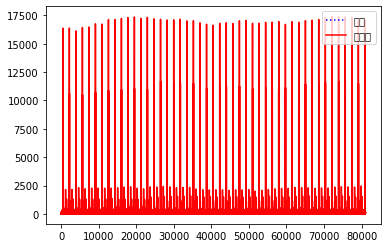

'temp-plot.html'

In [19]:
plt.plot(predict_y, 'b:') #預測
plt.plot(test_y, 'r-')    #收盤價
plt.legend(['預測', '收盤價'])
plt.show()

# 建立 DataFrame，加入 predict_y、test_y，準備以 plotly 繪圖
dd2=pd.DataFrame({"predict":list(predict_y),"label":list(test_y)})
#轉換為 numpy 陣列，並轉為 float
dd2["predict"] = np.array(dd2["predict"]).astype('float64')
dd2["label"] = np.array(dd2["label"]).astype('float64')

data = [
    Scatter(y=dd2["predict"],name='預測'),
    Scatter(y=dd2["label"],name='收盤價')
] 

plot({"data": data, "layout": Layout(title='2018年個股預測圖')},auto_open=True)

In [ ]:
p